In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from PIL import Image
from torchvision import transforms
import os

from torchvision.models.segmentation.deeplabv3 import DeepLabHead, deeplabv3_resnet101
# from torchvision.datasets import Cityscapes
from torchvision.datasets import DatasetFolder

from dataloader import DataLoaderSegmentation
from sklearn.metrics import confusion_matrix
import numpy as np

In [9]:
%load_ext autoreload
%autoreload 2

# the path should contain three folders -> leftlmg8bit and label_processed
path = '/Users/rajkrishnanv/Study/CSC2516/CSC2516_Final_Project/data_subset/'

batch_size = 10
# train and val only
loader_train = DataLoaderSegmentation(path, "train")
loader_val = DataLoaderSegmentation(path, "val")

inside
len:  83
image_file_size:  83
inside
len:  83
image_file_size:  83


In [10]:
image_datasets = {x: DataLoaderSegmentation(path, x) for x in ['train', 'val']}
# Create training and validation dataloaders
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'val']}


inside
len:  83
image_file_size:  83
inside
len:  83
image_file_size:  83


In [11]:
dataloaders_dict

{'train': <torch.utils.data.dataloader.DataLoader at 0x7fd11a190460>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x7fd11a1905e0>}

In [49]:
# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define hyperparameters
num_epochs = 2
batch_size = 2
learning_rate = 0.001



In [50]:


# Define model
model = deeplabv3_resnet101(pretrained=True, progress=True)

In [51]:
# Modify model to output correct number of classes
num_classes = 39
model.classifier = DeepLabHead(2048, num_classes)

# Freeze the backbone layers
for param in model.backbone.parameters():
    param.requires_grad = False

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)



In [52]:
# Train the model
model.to(device)
model.train()



DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [53]:
for epoch in range(num_epochs):
    for i, (inputs, targets) in enumerate(dataloaders_dict['train']):
        inputs = inputs.to(device)
        targets = targets.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        print("input shape: ", inputs.shape)
        outputs = model(inputs)['out']
        loss = criterion(outputs, targets.squeeze(1))
        loss.backward()
        optimizer.step()

        # Print statistics
        if (i + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(dataloaders_dict['train'])}], Loss: {loss.item():.4f}")
            
        

input shape:  torch.Size([10, 3, 224, 224])
Epoch [1/2], Step [1/9], Loss: 3.6260
Epoch [1/2], Training Loss: 3.6260, Validation Loss: 3.4736
input shape:  torch.Size([10, 3, 224, 224])
Epoch [1/2], Step [2/9], Loss: 3.3705
Epoch [1/2], Training Loss: 3.3705, Validation Loss: 3.1128
input shape:  torch.Size([10, 3, 224, 224])
Epoch [1/2], Step [3/9], Loss: 3.0557
Epoch [1/2], Training Loss: 3.0557, Validation Loss: 2.8793
input shape:  torch.Size([10, 3, 224, 224])
Epoch [1/2], Step [4/9], Loss: 3.2601
Epoch [1/2], Training Loss: 3.2601, Validation Loss: 2.9337
input shape:  torch.Size([10, 3, 224, 224])
Epoch [1/2], Step [5/9], Loss: 2.7641
Epoch [1/2], Training Loss: 2.7641, Validation Loss: 3.0250
input shape:  torch.Size([10, 3, 224, 224])
Epoch [1/2], Step [6/9], Loss: 2.5806
Epoch [1/2], Training Loss: 2.5806, Validation Loss: 3.1431
input shape:  torch.Size([10, 3, 224, 224])
Epoch [1/2], Step [7/9], Loss: 2.6644
Epoch [1/2], Training Loss: 2.6644, Validation Loss: 3.0811
input 

In [2]:
# save model
torch.save(model.state_dict(), 'deeplabv3_resnet101-raj.pt')

NameError: name 'torch' is not defined

In [50]:
# Define the device for the model
num_classes = 39

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load the model
model = deeplabv3_resnet101(pretrained=True, progress=True)
model.classifier = DeepLabHead(2048, num_classes)
checkpoint = torch.load('deeplabv3_resnet101-raj.pt', map_location=device)

model.load_state_dict(checkpoint)
model.eval()

# criterion
criterion = nn.CrossEntropyLoss()

/Users/rajkrishnanv/miniconda3/envs/dl/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/rajkrishnanv/miniconda3/envs/dl/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [51]:
# Validation

# Define the IoU function
def IoU(pred, target, num_classes):
    ious = []
    for cls in range(num_classes):
        pred_i = pred == cls
        target_i = target == cls
        intersection = (pred_i[target_i]).sum().float()
        union = pred_i.sum().float() + target_i.sum().float() - intersection
        iou = intersection / union
        ious.append(iou)
    return ious

In [52]:
def calculate_iou(outputs, targets, num_classes):
    ious = []
    for cls in range(num_classes):
        tp = (outputs == cls) & (targets == cls)
        fp = (outputs == cls) & (targets != cls)
        fn = (outputs != cls) & (targets == cls)
        intersection = tp.sum()
        union = tp.sum() + fp.sum() + fn.sum() + 1e-10
        iou = float(intersection) / float(union)
        ious.append(iou)
    return ious

# Pixel by pixel accuracy
def calculate_accuracy(outputs, targets):
    acc = (outputs == targets).sum().item() / targets.numel()
    return acc

# Assuming that the model has been finetuned and loaded as `model` and the data loader as `dataloader`
model.eval()
num_classes = 39  # Change to the number of classes in your dataset
iou_list = []
acc_list = []
with torch.no_grad():
    for inputs, targets in dataloaders_dict['val']:
        inputs = inputs.to(device)
        targets = targets.to(device)
        
        # Forward pass
        outputs = model(inputs)['out']
        preds = outputs.argmax(dim=1)

        # Calculate IoU
        ious = calculate_iou(preds, targets, num_classes)
        iou_list.append(ious)

        # Calculate accuracy
        acc = calculate_accuracy(preds, targets)
        acc_list.append(acc)

    # Calculate mean IoU and accuracy
    mean_iou = np.mean(iou_list, axis=0)
    mean_acc = np.mean(acc_list)

    print(f"Mean IoU: {mean_iou}")
    print(f"Mean accuracy: {mean_acc}")

Mean IoU: [0.         0.         0.44251831 0.         0.         0.
 0.         0.         0.         0.         0.00044793 0.
 0.         0.         0.         0.02461587 0.02572105 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.28413543 0.         0.         0.         0.
 0.         0.23891895 0.        ]
Mean accuracy: 0.4085952262849585


## Graph Part

In [1]:
import pandas as pd

In [17]:
df = pd.read_csv('results_unet.csv')

In [18]:
a = []
for i in df['0']:
    a.append(int(i[23:-3]))
    
df['step'] = a

df = df.sort_values('step')

In [19]:
df.to_csv('results_unet_updated.csv')

In [22]:
import json
  
# Opening JSON file
f = open('id2label.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)
data

{'0': 'curb',
 '1': 'caravan',
 '2': 'road',
 '3': 'out of roi',
 '4': 'tunnel',
 '5': 'license plate',
 '6': 'sidewalk',
 '7': 'bus',
 '8': 'trailer',
 '9': 'vehicle fallback',
 '10': 'obs-str-bar-fallback',
 '11': 'autorickshaw',
 '12': 'polegroup',
 '13': 'animal',
 '14': 'car',
 '15': 'building',
 '16': 'drivable fallback',
 '17': 'train',
 '18': 'rectification border',
 '19': 'pole',
 '20': 'ego vehicle',
 '21': 'non-drivable fallback',
 '22': 'motorcycle',
 '23': 'fallback background',
 '24': 'billboard',
 '25': 'wall',
 '26': 'parking',
 '27': 'rider',
 '28': 'rail track',
 '29': 'traffic sign',
 '30': 'guard rail',
 '31': 'sky',
 '32': 'fence',
 '33': 'traffic light',
 '34': 'bridge',
 '35': 'person',
 '36': 'bicycle',
 '37': 'vegetation',
 '38': 'truck'}

mkdir: unet_graphs: File exists


/var/folders/4s/klt6rz7n2fqgl7zndm4nhv8c0000gn/T/ipykernel_7720/414755295.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


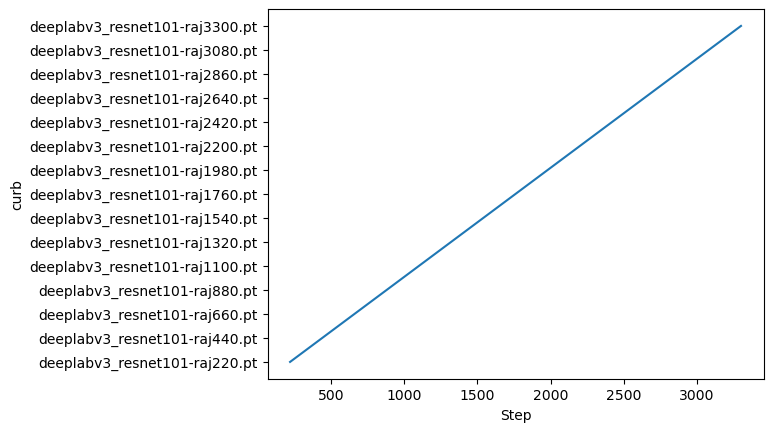

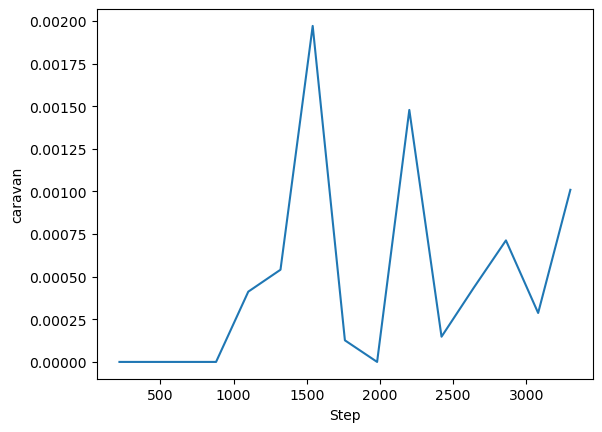

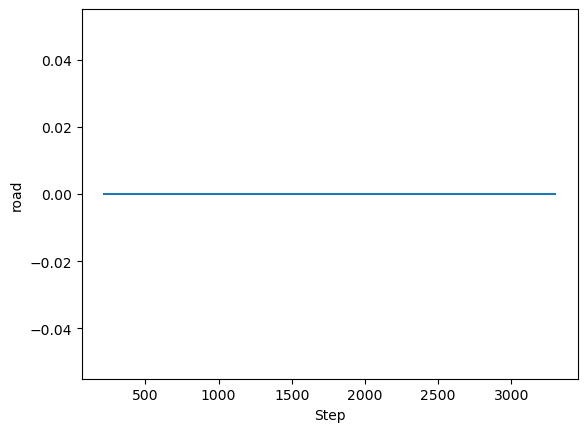

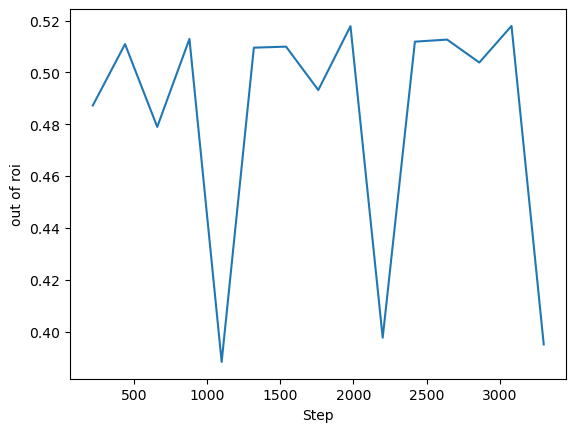

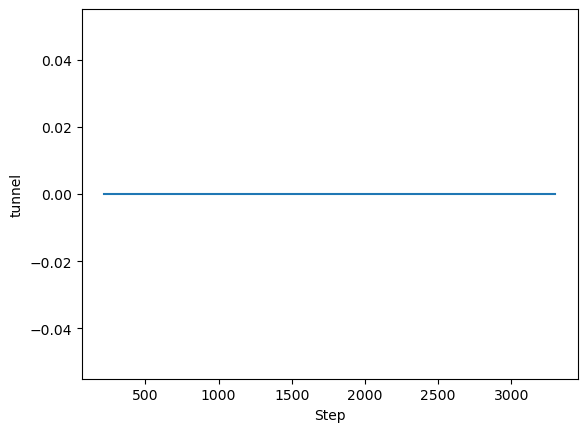

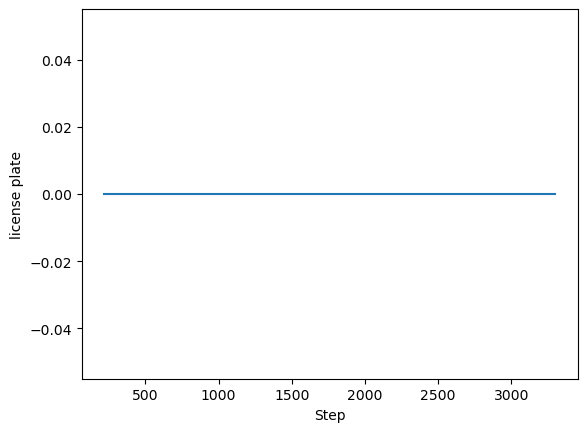

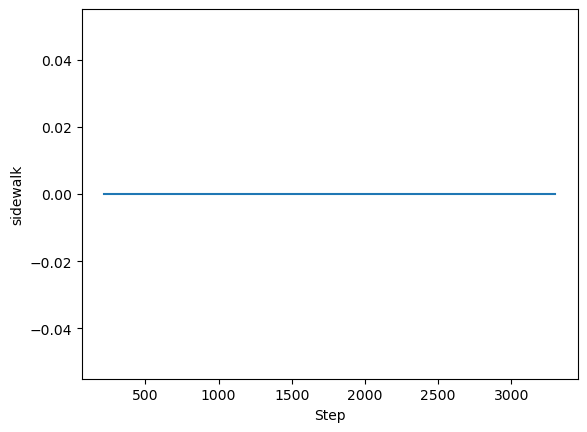

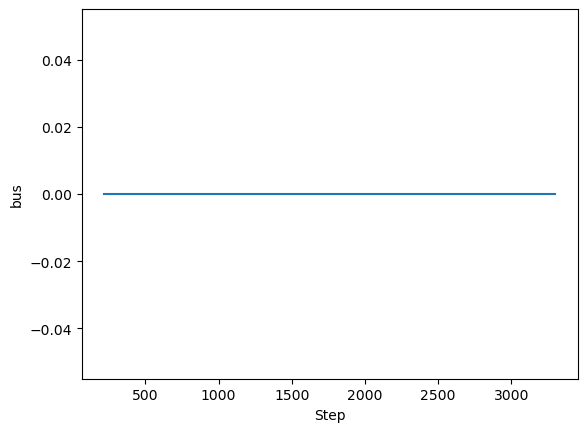

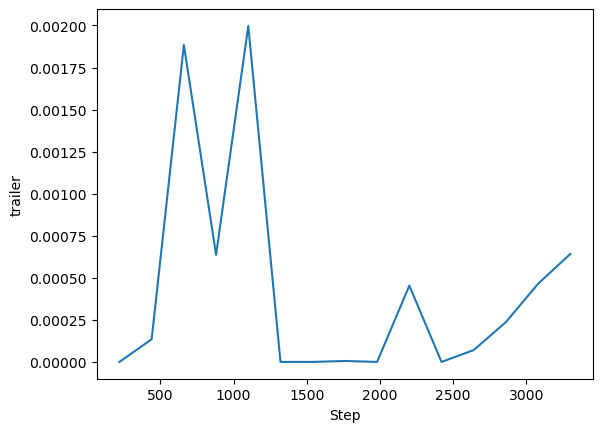

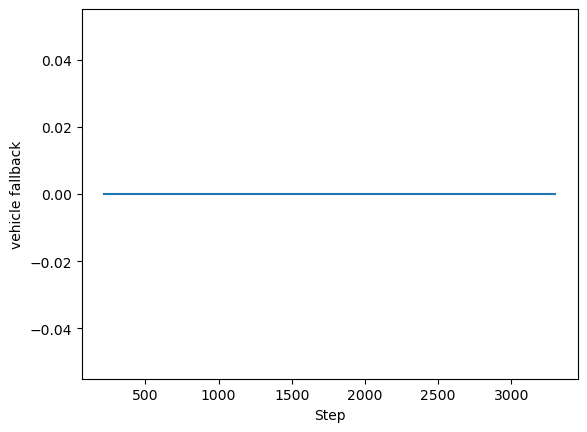

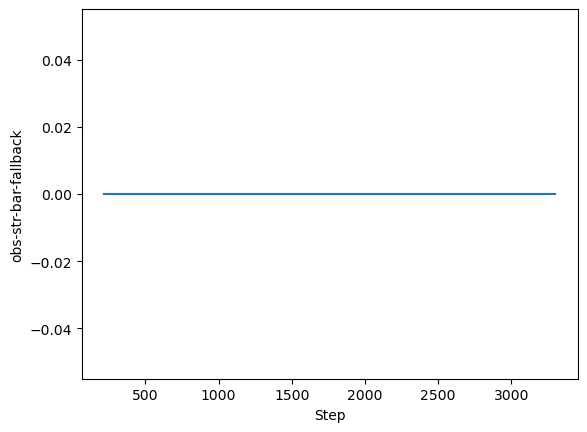

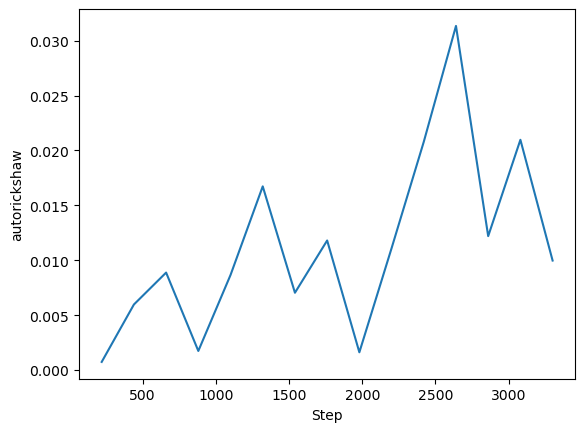

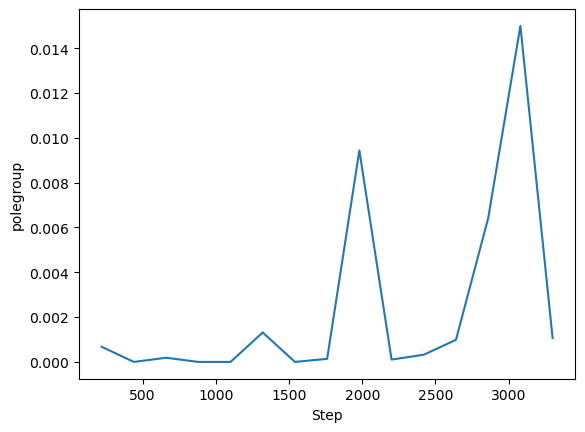

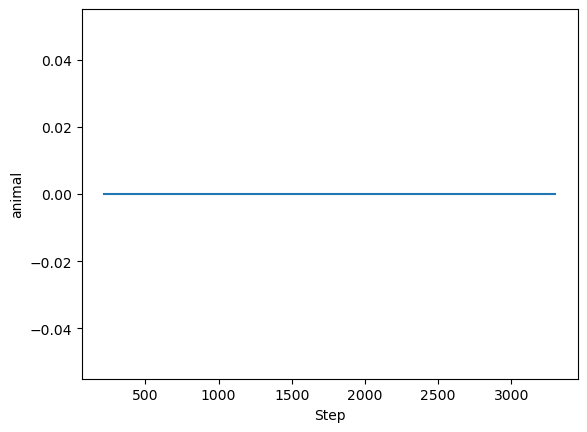

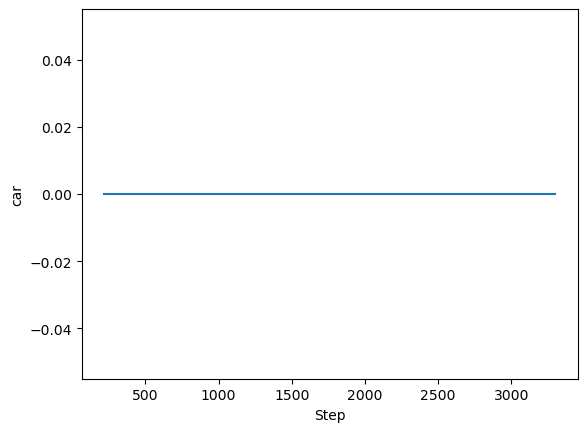

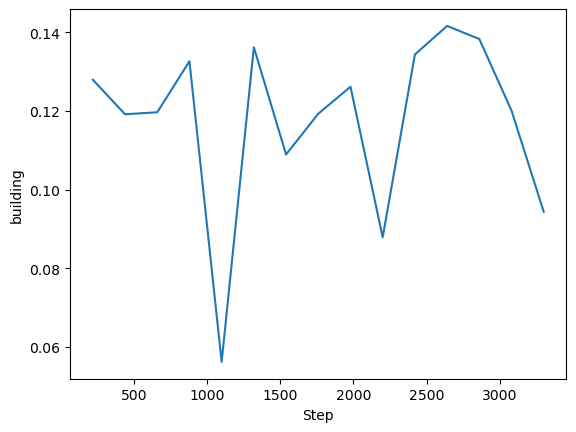

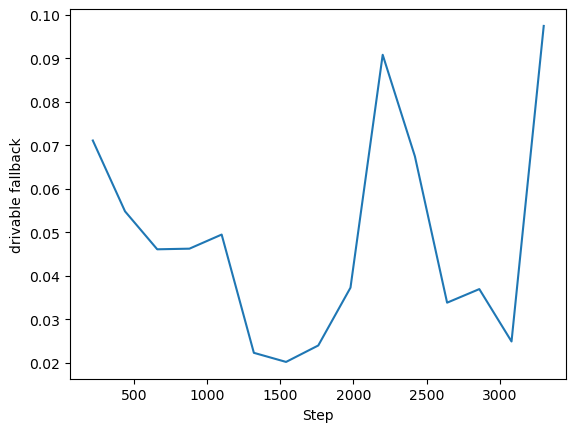

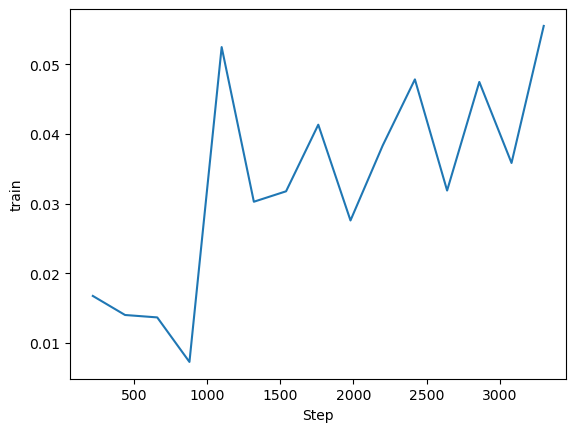

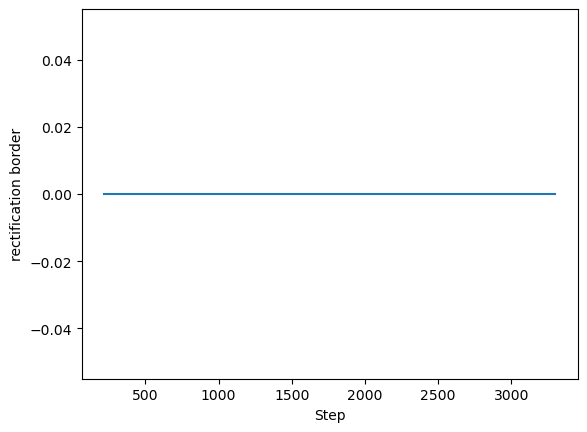

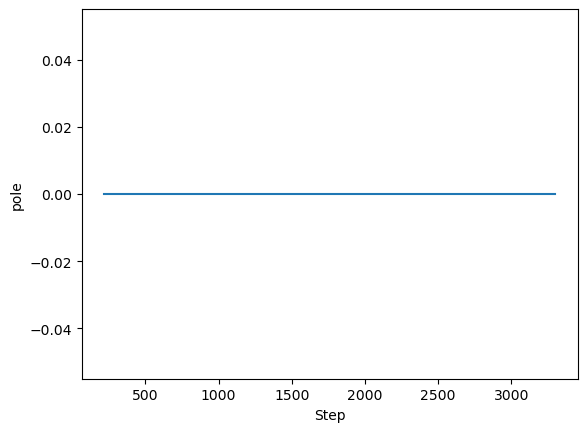

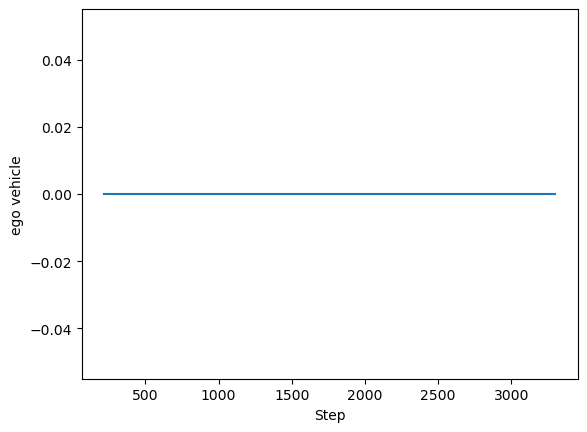

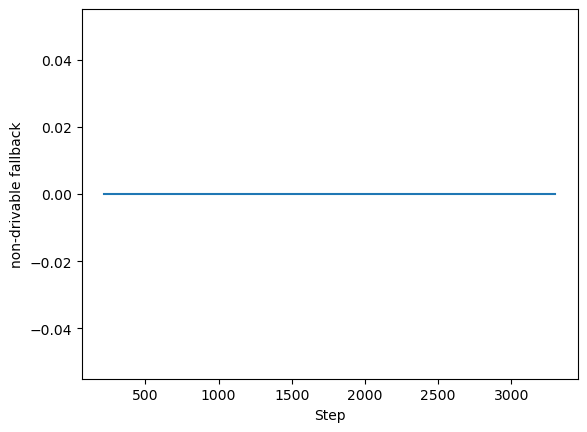

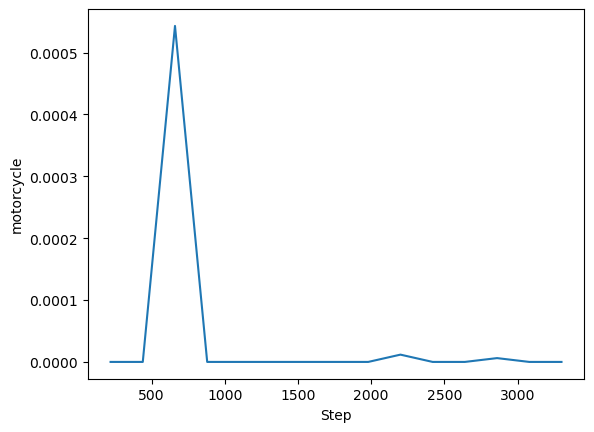

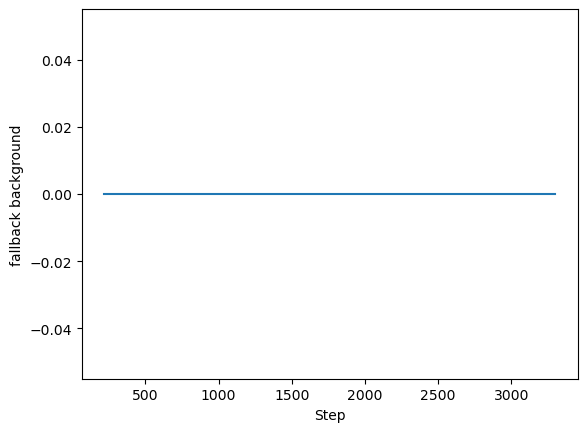

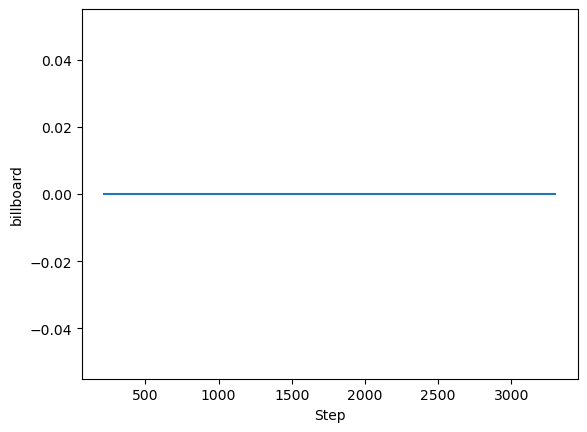

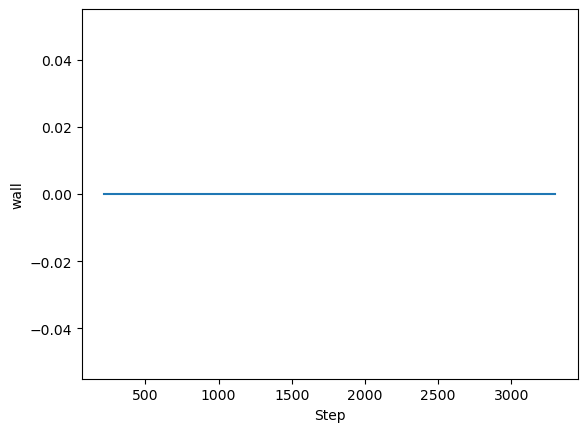

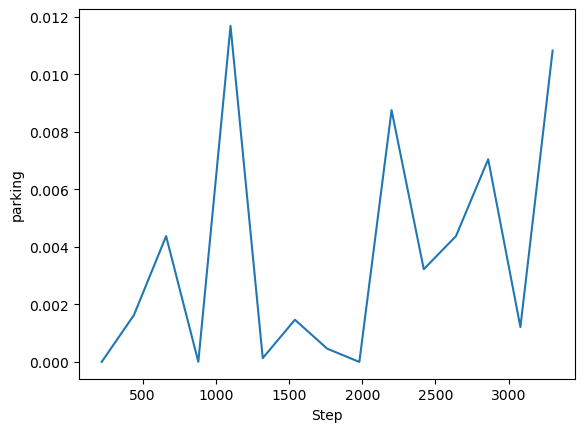

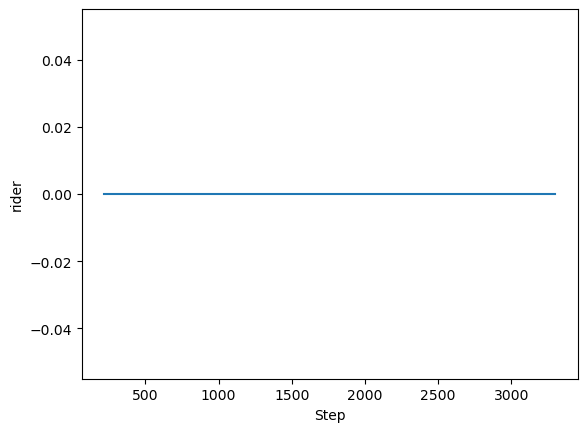

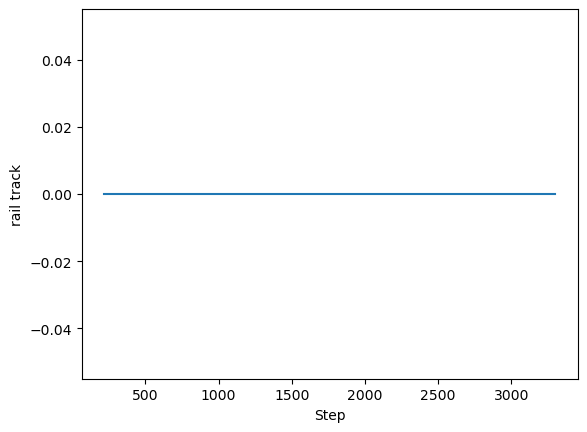

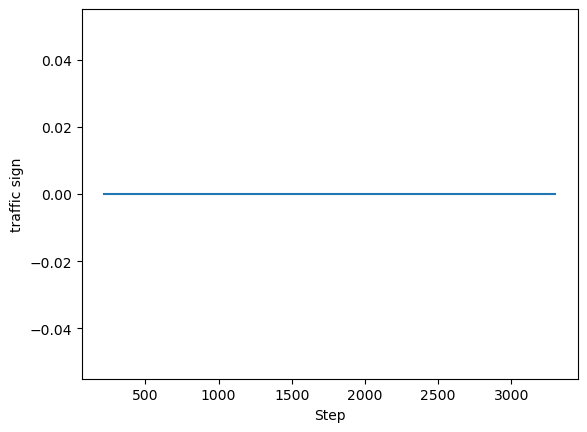

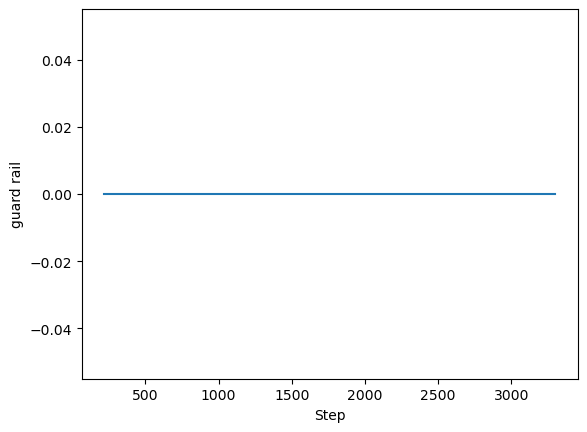

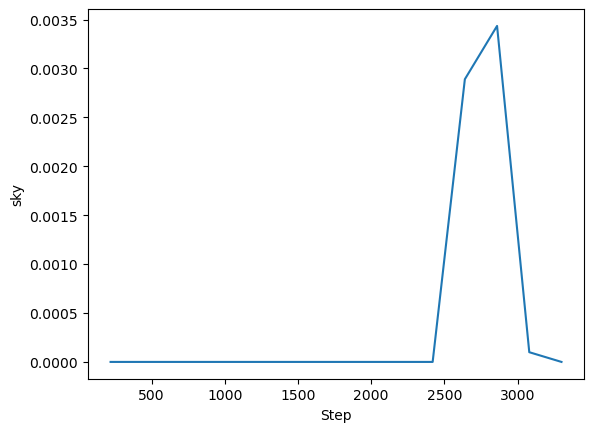

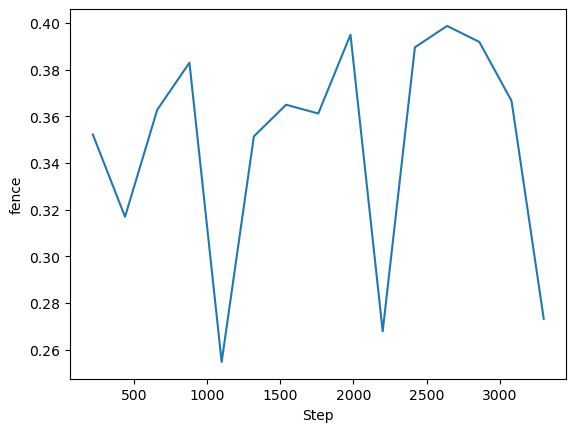

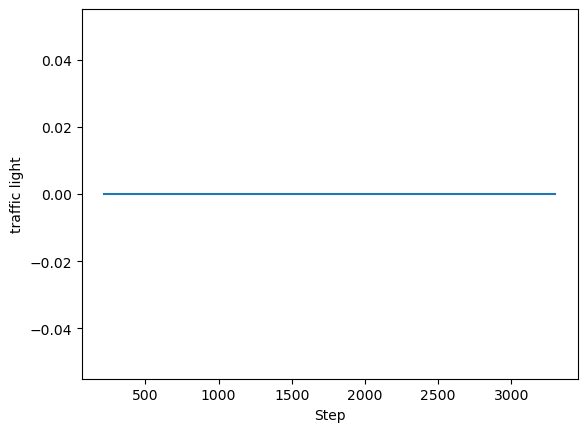

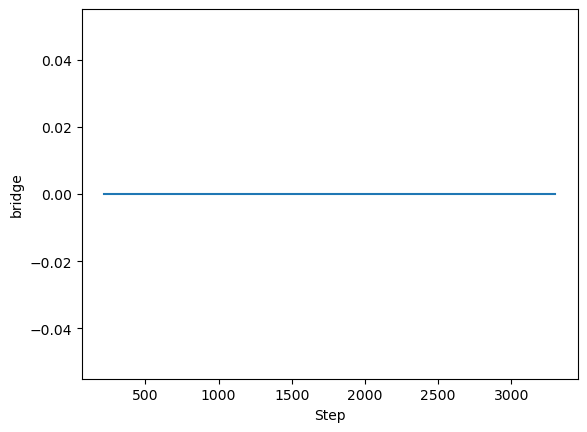

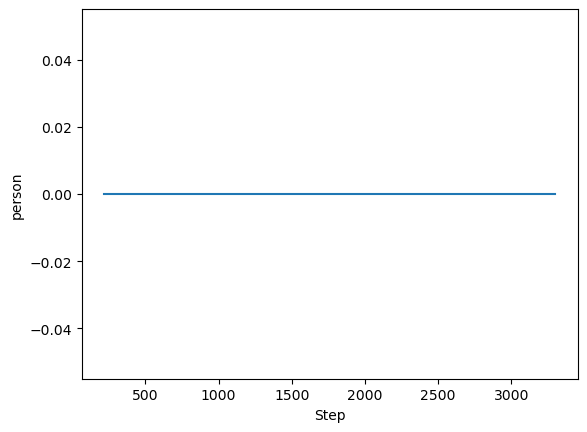

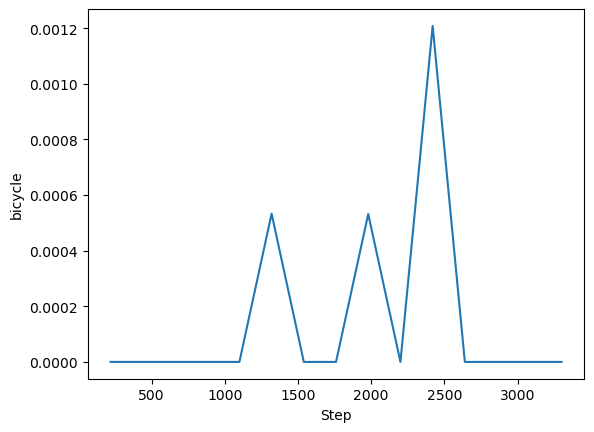

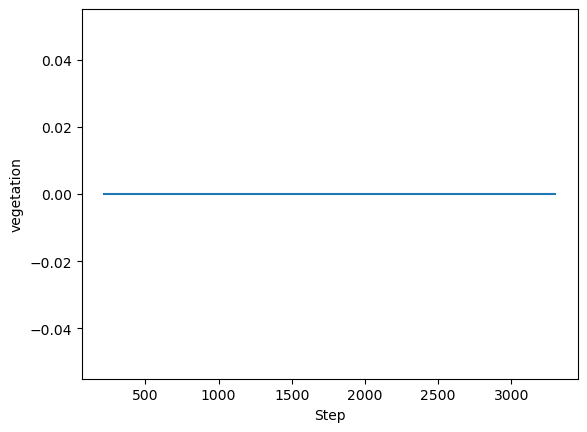

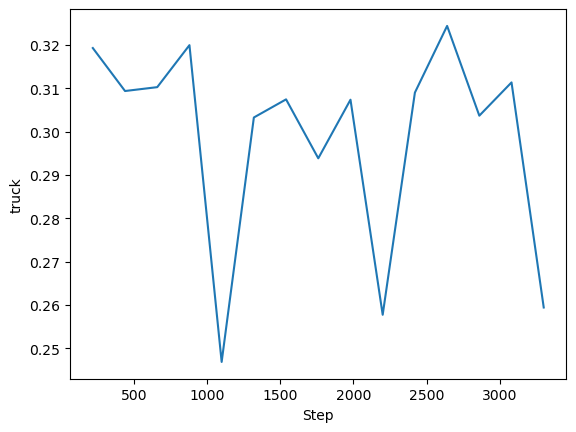

In [25]:
import matplotlib.pyplot as plt

!mkdir unet_graphs

for i in range(0,39):
    plt.figure()
    class_no = str(i)
    plt.plot(df['step'], df[class_no])
    plt.xlabel("Step")
    plt.ylabel(data[class_no])
    fig_name = "unet_graphs/unet_iou_" + data[class_no] + ".png"
    plt.savefig(fig_name)

KeyError: '40'

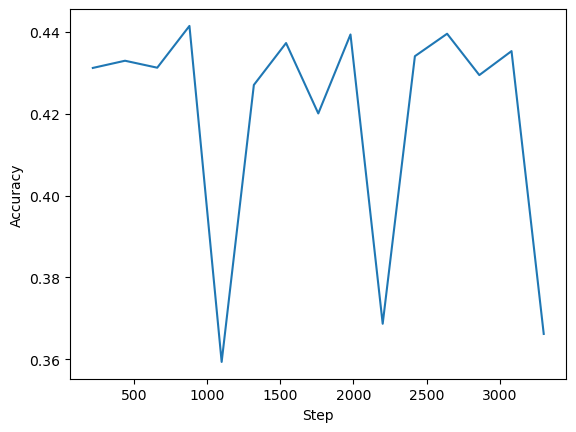

In [26]:
# accuracy plot
plt.figure()
class_no = str(40)
plt.plot(df['step'], df[class_no])
plt.xlabel("Step")
plt.ylabel("Accuracy")
fig_name = "unet_graphs/unet_accuracy.png"
plt.savefig(fig_name)